In [1]:
__author__ = "Ankur Dhoot"

## Recursion Notebook

### Purpose

This notebook will demonstrate recursive problems.

### Set-Up

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import time


##  Binary Search

### Iterative (Remember me?)

In [5]:
def binary_search(search_list, target_value):
    lo = 0
    hi = len(search_list) - 1
    while lo <= hi:
        mid = (lo + hi) // 2
        value = search_list[mid]
        if value == target_value:
            # We found it!
            return mid
        elif value < target_value:
            # We no longer need to search the left half since the target is in the right half if it exists.
            lo = mid + 1
        else:
            # The target is in the left half if it exists
            hi = mid - 1
    return -1

In [6]:
assert binary_search([1,3,5,8], 5) == 2
assert binary_search([1,3,5,8], 10) == -1
assert binary_search([1,3,5,6,8], 6) == 3
assert binary_search([1,3,5,6,8], 1) == 0

### Recursive

In [7]:
def binary_search_recursive(search_list, target_value):
    return search_recursive(search_list, target_value, 0, len(search_list) - 1)

def search_recursive(search_list, target_value, lo, hi):
    # Base Case
    if lo > hi:
        return -1
    
    mid = (lo + hi) // 2
    value = search_list[mid]
    
    if value == target_value:
        # We found it!
        return mid
    elif value < target_value:
        # We no longer need to search the left half since the target is in the right half if it exists.
        lo = mid + 1
        return search_recursive(search_list, target_value, lo, hi)
    else:
        # The target is in the left half if it exists
        hi = mid - 1
        return search_recursive(search_list, target_value, lo, hi)
        

In [8]:
assert binary_search_recursive([1,3,5,8], 5) == 2
assert binary_search_recursive([1,3,5,8], 10) == -1
assert binary_search_recursive([1,3,5,6,8], 6) == 3
assert binary_search_recursive([1,3,5,6,8], 1) == 0

## Fibonacci Numbers

https://en.wikipedia.org/wiki/Fibonacci_number

$F_{n}$ = $F_{n-1}$ + $F_{n-2}$, $F_{0}$ = 0, $F_{1}$ = 1

In [10]:
def fibonacci(n):
    # Base Cases
    if n == 0:
        return 0
    if n == 1:
        return 1
    return fibonacci(n-1) + fibonacci(n-2)

In [11]:
assert fibonacci(0) == 0
assert fibonacci(1) == 1
assert fibonacci(2) == 1
assert fibonacci(3) == 2
assert fibonacci(4) == 3
assert fibonacci(5) == 5
assert fibonacci(12) == 144

In [12]:
fibonacci(0)

0

In [13]:
fibonacci(1)

1

In [22]:
fibonacci(38)

39088169

Anybody see a problem with this implementation?

Let's look at how the runtime scales.

In [26]:
num_runs = 25
highest_fibonacci_to_compute = 30

In [27]:
def eval_algorithm(algorithm, num_runs=25, highest_fibonacci_to_compute=40):
    # Run the algorithm multiple times for each fibonacci number.
    timings = []

    for i in range(highest_fibonacci_to_compute):
        start_time = time.time()
        for run in range(num_runs):
            # Compute the ith fibonacci number.
            algorithm(i)
        end_time = time.time()
        total_time = end_time - start_time

        # Record how long sorting took on average
        timings.append(total_time / num_runs)

    plt.plot(timings)
    plt.ylabel('RunTime')
    plt.xlabel('Fibonacci Number')

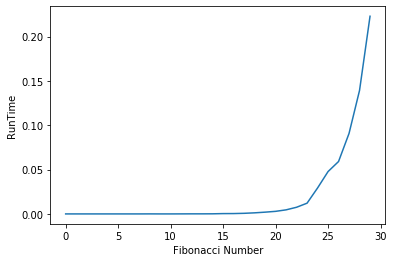

In [28]:
eval_algorithm(fibonacci, num_runs=num_runs, highest_fibonacci_to_compute=highest_fibonacci_to_compute)

Yikes, that doesn't seem so efficient. We can do better.

Notice how much repeated computation we do. For example, when calculating $F_{6}$, we call $F_{3}$ 3 times!

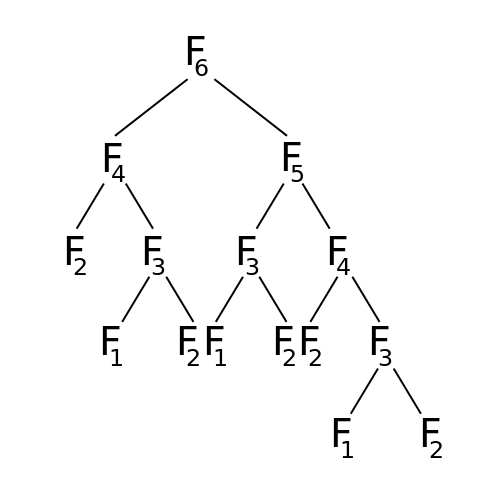

Let's avoid this repeated computation by saving the results.

https://en.wikipedia.org/wiki/Memoization

In [29]:
def fibonacci_fast(n):
    # Initialize with the base cases.
    memoized = {0 : 0, 1 : 1}
    return fibonacci_memoized(n, memoized)
    
def fibonacci_memoized(n, memoized):
    # Returns the nth fibonacci number
    # memoized contains the results of previous computations
    # After returning, memoized will contain the nth fibonnaci number
    if n in memoized:
        return memoized[n]
    # Compute the nth fibonacci element
    result = fibonacci_memoized(n-1, memoized) + fibonacci_memoized(n-2, memoized)
    # Save it!
    memoized[n] = result
    # Return it.
    return result
    

In [30]:
assert fibonacci_fast(0) == 0
assert fibonacci_fast(1) == 1
assert fibonacci_fast(2) == 1
assert fibonacci_fast(3) == 2
assert fibonacci_fast(4) == 3
assert fibonacci_fast(5) == 5
assert fibonacci_fast(12) == 144

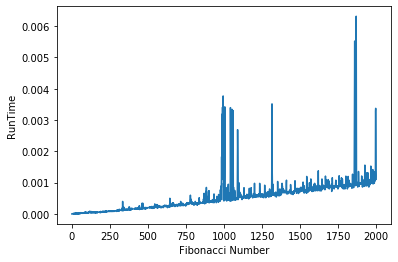

In [32]:
eval_algorithm(fibonacci_fast, num_runs=50, highest_fibonacci_to_compute=2000)

## Conclusion

Memoization can provide big time speedups!

## Applications

https://leetcode.com/problems/maximum-depth-of-binary-tree/
https://leetcode.com/problems/balanced-binary-tree/